In [ ]:
import pandas as stocktrend_pand
StockTrends = stocktrend_pand.read_csv('goldstock v1.csv')
num_rows, num_columns = StockTrends.shape
print(f"Number of Rows in Gold Stock   : {num_rows}")
print(f"Number of Columns in Gold Stock: {num_columns}")
print("\nGold Stocks:\n", StockTrends)

Number of Rows in Gold Stock   : 2511
Number of Columns in Gold Stock: 7

Gold Stocks:
       Unnamed: 0        Date   Close    Volume    Open    High     Low
0              0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1              1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2              2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3              3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4              4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
...          ...         ...     ...       ...     ...     ...     ...
2506        2528  2014-01-28  1250.5   81426.0  1254.9  1261.9  1248.0
2507        2529  2014-01-27  1263.5   63419.0  1269.9  1280.1  1252.0
2508        2530  2014-01-24  1264.5   34998.0  1264.3  1273.2  1256.9
2509        2531  2014-01-23  1262.5   41697.0  1235.1  1267.1  1230.8
2510        2532  2014-01-22  1238.6   80262.0  1240.5  1243.5  1235.5

[2511 rows x 7 columns]


In [ ]:
StockTrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [ ]:
StockTrends['Close'].value_counts()

Close
1294.8    7
1323.4    4
1793.5    4
1347.9    4
1309.3    4
         ..
1868.4    1
1876.9    1
1866.3    1
1882.3    1
1262.5    1
Name: count, Length: 2059, dtype: int64

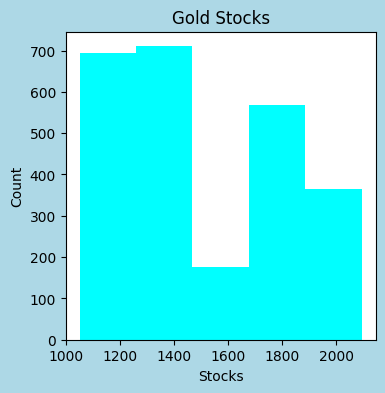

In [ ]:
import matplotlib.pyplot as stocktrend_matp
import warnings as stocktrendwrng
fig = stocktrend_matp.figure(figsize=(4, 4), facecolor='lightblue')
stocktrend_matp.hist(StockTrends['Close'], bins=5, color = "cyan")
stocktrend_matp.title('Gold Stocks')
stocktrend_matp.xlabel("Stocks")
stocktrend_matp.ylabel("Count")
stocktrend_matp.show()

[Text(0.5, 1.0, 'Gold Stock Price'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Stock Price')]

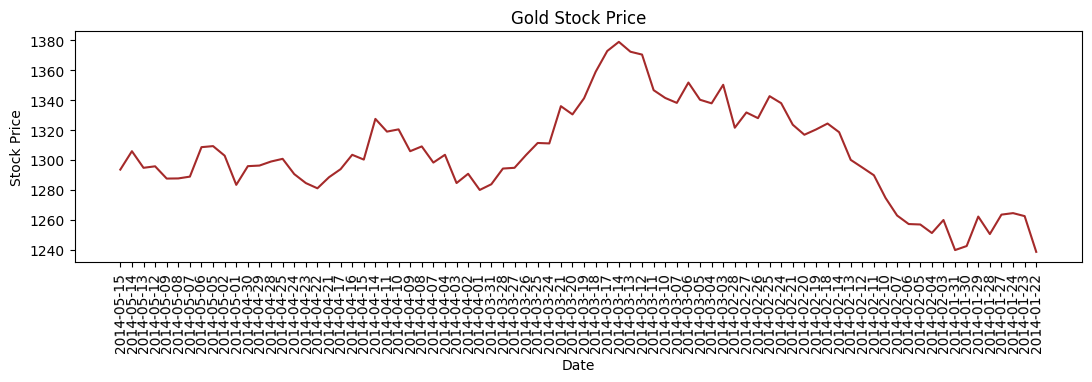

In [ ]:
stocktrend_matp.figure(figsize=(13, 3))
import seaborn as stocktrend_seb
stocktrend_matp.xticks(rotation=91)
stockline= stocktrend_seb.lineplot(x=StockTrends["Date"][-80:], y=StockTrends['Close'][-80:], color='brown')
stockline.set(title= 'Gold Stock Price', xlabel ='Date', ylabel ='Stock Price')

In [ ]:
print("NaN in Gold Stock :",StockTrends.isnull().values.sum())
print("Duplicates in Gold Stock :",StockTrends[StockTrends.duplicated()].shape[0])

NaN in Gold Stock : 0
Duplicates in Gold Stock : 0


In [ ]:
import warnings as stocktrendwrng
stocktrendwrng.filterwarnings("ignore")
StockTrends= StockTrends[['Date', 'Close']]
StockTrends

,Date,Close
0,2024-01-19,2029.3
1,2024-01-18,2021.6
2,2024-01-17,2006.5
3,2024-01-16,2030.2
4,2024-01-12,2051.6
...,...,...
2506,2014-01-28,1250.5
2507,2014-01-27,1263.5
2508,2014-01-24,1264.5
2509,2014-01-23,1262.5


In [ ]:
import numpy as stocktrendnmpy
from tensorflow.keras.models import Sequential as stocktrendSqtial
from tensorflow.keras.layers import Dense as stocktrendDn

from sklearn.metrics import r2_score as stocktrendRsq
from sklearn.metrics import mean_absolute_error as stocktrendMAE
from sklearn.metrics import mean_squared_error as stocktrendMSE
import math as stocktrendMath

StockTrends = StockTrends.replace([stocktrendnmpy.inf, -stocktrendnmpy.inf, stocktrendnmpy.nan], 0).reset_index(drop=True)

In [ ]:
#======= Function to create sequences of data
def stocktrnd(stockTS, stockStep):
    stocktrend_X = []
    stocktrend_y = []
    for s in range(len(stockTS)):
        StockEnd = s + stockStep
        if StockEnd > len(stockTS)-1:
            break
        StockEnd_ip, StockEnd_op = stockTS[s:StockEnd], stockTS[StockEnd]
        stocktrend_X.append(StockEnd_ip)
        stocktrend_y.append(StockEnd_op)
    return stocktrendnmpy.array(stocktrend_X), stocktrendnmpy.array(stocktrend_y)

In [ ]:
#======== Training and testing the stock data
stockStep = 2
stocktrend_Xt, stocktrend_yt = stocktrnd(StockTrends['Close'][:-100].tolist(), stockStep)
stocktrend_Xs, stocktrend_ys = stocktrnd(StockTrends['Close'][-110:].tolist(), stockStep)
print("Doge Coin Stock Training: ", stocktrend_Xt.shape)
print("Doge Coin Stock Testing : ", stocktrend_Xs.shape)

Doge Coin Stock Training:  (2409, 2)
Doge Coin Stock Testing :  (108, 2)


In [ ]:
#======= Reshape the stock data
stocktrend_Xt = stocktrend_Xt.reshape(stocktrend_Xt.shape[0], stocktrend_Xt.shape[1], 1)
stocktrend_Xs = stocktrend_Xs.reshape(stocktrend_Xs.shape[0], stocktrend_Xs.shape[1], 1)

print("Reshaped Training Doge Coin Stock: ", stocktrend_Xt.shape)
print("Reshaped Testing Doge Coin Stock :", stocktrend_Xs.shape)

Reshaped Training Doge Coin Stock:  (2409, 2, 1)
Reshaped Testing Doge Coin Stock : (108, 2, 1)


## **Unidirectional Models**

### **Gold Stock - Unidirectional LSTM**

Epoch 1/20
25/25 [==============================] - 2s 5ms/step - loss: 1358.4342
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 1205.9165
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 978.8791
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 731.3416
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 448.5150
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 113.0174
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 19.3337
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 12.3700
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 11.4662
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 11.3844
Epoch 11/20
25/25 [==============================] - 0s 5ms/step - loss: 11.4146
Epoch 12/20
25/25 [==============================] - 0s 6ms/step - loss: 11.3896
Epoch 13/20
25/25 [==========

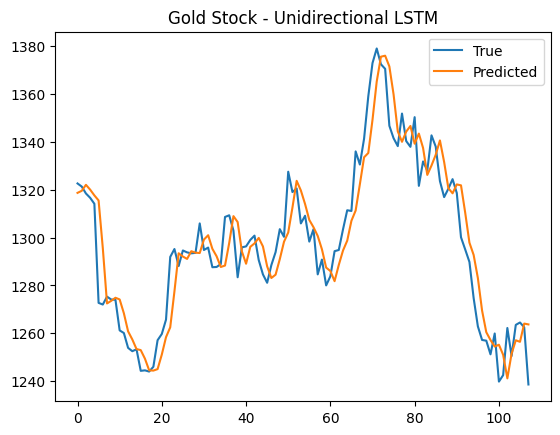

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendUnLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Unidirectional LSTM:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Unidirectional LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Gold Stock - Unidirectional GRU**

Epoch 1/20
25/25 [==============================] - 2s 10ms/step - loss: 1352.8444
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 1085.5010
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 777.2637
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 392.9405
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 46.9383
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 15.6392
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 11.4561
Epoch 8/20
25/25 [==============================] - 0s 11ms/step - loss: 11.1002
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 11.0722
Epoch 10/20
25/25 [==============================] - 0s 10ms/step - loss: 11.0637
Epoch 11/20
25/25 [==============================] - 0s 10ms/step - loss: 11.0559
Epoch 12/20
25/25 [==============================] - 0s 11ms/step - loss: 11.0391
Epoch 13/20
25/25 [====

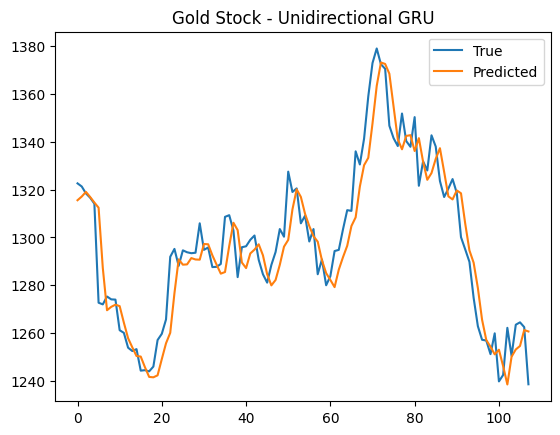

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendUnGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Unidirectional GRU:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Unidirectional GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Gold Stock - Unidirectional RNN**

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 676.5563
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 69.0043
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 17.9287
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 12.8376
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 12.7136
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 12.5039
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 12.6397
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 12.4868
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 12.8568
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 12.5900
Epoch 11/20
25/25 [==============================] - 0s 3ms/step - loss: 12.4841
Epoch 12/20
25/25 [==============================] - 0s 3ms/step - loss: 12.8560
Epoch 13/20
25/25 [=================

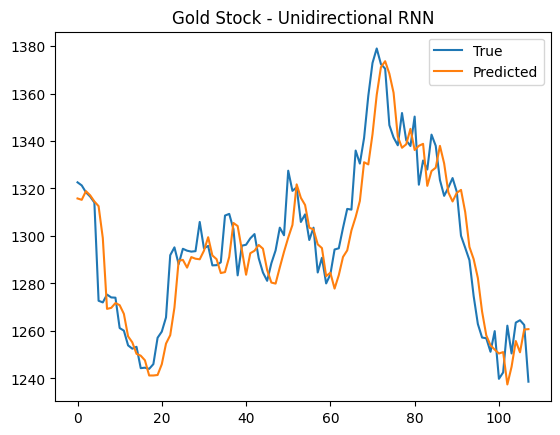

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendUnRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnRN(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Unidirectional RNN:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Unidirectional RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

## **Stacked Models**

### **Gold Stock - Stacked LSTM**

Epoch 1/20
25/25 [==============================] - 3s 13ms/step - loss: 1390.9661
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 1154.4459
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 680.3119
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 92.5621
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 22.5128
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 13.8037
Epoch 7/20
25/25 [==============================] - 0s 18ms/step - loss: 13.0705
Epoch 8/20
25/25 [==============================] - 1s 24ms/step - loss: 12.6469
Epoch 9/20
25/25 [==============================] - 1s 20ms/step - loss: 12.9065
Epoch 10/20
25/25 [==============================] - 1s 22ms/step - loss: 12.7160
Epoch 11/20
25/25 [==============================] - 1s 22ms/step - loss: 13.0412
Epoch 12/20
25/25 [==============================] - 1s 22ms/step - loss: 13.0167
Epoch 13/20
25/25 [=

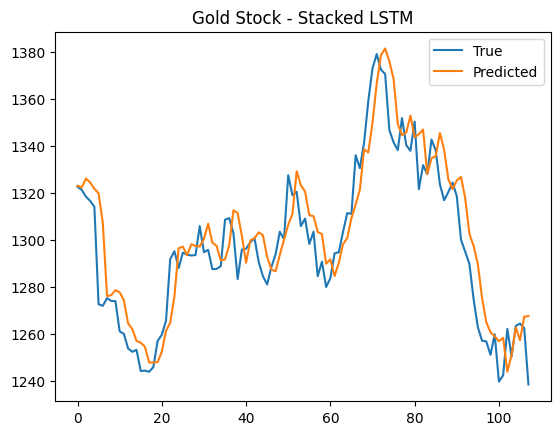

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendStLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Stacked LSTM:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Stacked LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Gold Stock - Stacked GRU**

Epoch 1/20
25/25 [==============================] - 3s 11ms/step - loss: 1282.5045
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 684.9894
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 79.5921
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 18.0078
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 11.9815
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 11.3563
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 11.7762
Epoch 8/20
25/25 [==============================] - 1s 23ms/step - loss: 11.6709
Epoch 9/20
25/25 [==============================] - 1s 20ms/step - loss: 12.2602
Epoch 10/20
25/25 [==============================] - 0s 10ms/step - loss: 11.3670
Epoch 11/20
25/25 [==============================] - 0s 12ms/step - loss: 11.2380
Epoch 12/20
25/25 [==============================] - 0s 10ms/step - loss: 11.1384
Epoch 13/20
25/25 [=====

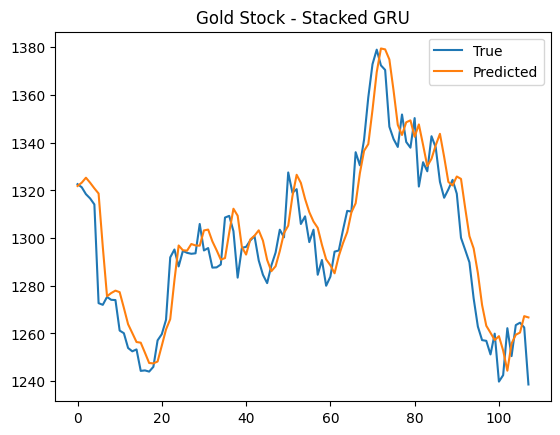

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendStGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Stacked GRU:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Stacked GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Gold Stock - Stacked RNN**

Epoch 1/20
25/25 [==============================] - 3s 12ms/step - loss: 1479.1772
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 1325.9269
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 1011.2571
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 354.6815
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 38.7188
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 14.2302
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 13.2128
Epoch 8/20
25/25 [==============================] - 0s 12ms/step - loss: 12.9883
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 12.7660
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - loss: 12.8576
Epoch 11/20
25/25 [==============================] - 0s 11ms/step - loss: 13.1643
Epoch 12/20
25/25 [==============================] - 0s 11ms/step - loss: 12.7285
Epoch 13/20
25/25 

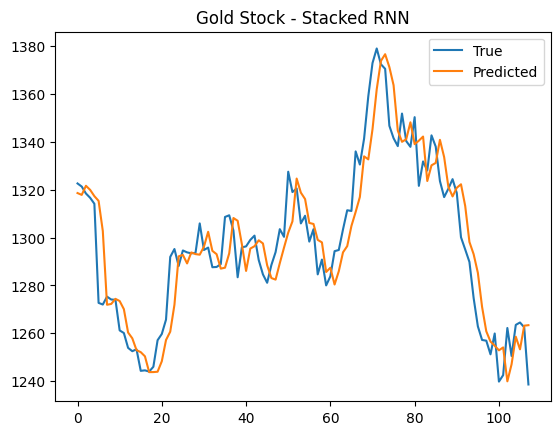

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendStRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Gold Stock - Stacked RNN:\n")
print("Gold Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Gold Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Gold Stock - Stacked RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()